In [18]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [19]:
#reading data
df = pd.read_csv("mcdonalds.csv")

In [20]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [21]:
# Converting data of Yes/No data into numerical inputs
# Yes == 1
# No == 0

df["yummy"] = (df["yummy"] == "Yes").astype(int)
df["convenient"] = (df["convenient"] == "Yes").astype(int)
df["spicy"] = (df["spicy"] == "Yes").astype(int)
df["fattening"] = (df["fattening"] == "Yes").astype(int)
df["greasy"] = (df["greasy"] == "Yes").astype(int)
df["fast"] = (df["fast"] == "Yes").astype(int)
df["cheap"] = (df["cheap"] == "Yes").astype(int)
df["tasty"] = (df["tasty"] == "Yes").astype(int)
df["expensive"] = (df["expensive"] == "Yes").astype(int)
df["healthy"] = (df["healthy"] == "Yes").astype(int)
df["disgusting"] = (df["disgusting"] == "Yes").astype(int)

In [22]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male


In [23]:
# Mean of the columns with Yes or No

round(df[["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]].mean(),2)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64

In [24]:
pca = PCA()

# Fit PCA to your data
MD_pca = pca.fit_transform(df[["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]])

# Summary of PCA
summary = pd.DataFrame({
    'Standard deviation': pca.explained_variance_,
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': pca.explained_variance_ratio_.cumsum()
})

print(summary)


    Standard deviation  Proportion of Variance  Cumulative Proportion
0             0.573124                0.299447               0.299447
1             0.369002                0.192797               0.492244
2             0.254641                0.133045               0.625290
3             0.159040                0.083096               0.708386
4             0.113842                0.059481               0.767866
5             0.096270                0.050300               0.818166
6             0.083925                0.043849               0.862015
7             0.075692                0.039548               0.901563
8             0.070358                0.036761               0.938323
9             0.061922                0.032353               0.970677
10            0.056123                0.029323               1.000000


C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

In [25]:
# Assuming MD_pca is the result of PCA transformation
# and pca is the PCA object fitted to your data

print("Principal Components:")
print(pca.components_)

print("\nExplained Variances:")
print(pca.explained_variance_.round(1))


Principal Components:
[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.113

C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

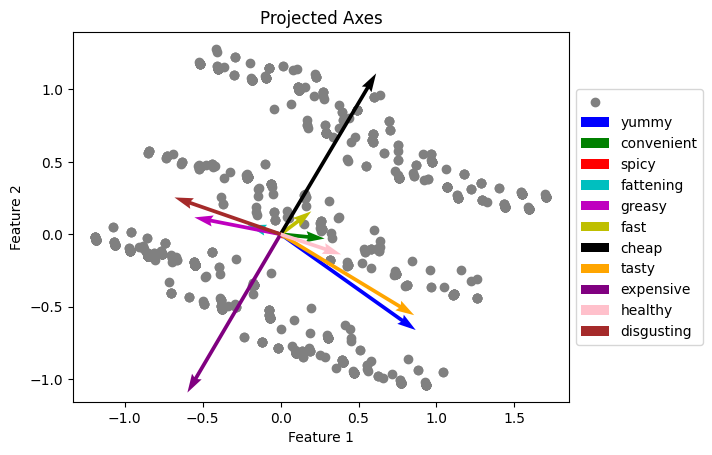

In [26]:
# Plotting the PCA results
plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Plot')

# Projecting axes
pca = PCA()
pca.fit(df[["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]])

# Getting the principal components
PC_axes = pca.components_[:2]

# Plotting the projected axes
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Projected Axes')

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown']

# Plotting the quivers for each attribute with adjusted orientation and thinner arrows
for i, attribute in enumerate(["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]):
    plt.quiver(0, 0, -PC_axes[0][i], -PC_axes[1][i], color=colors[i], angles='xy', scale_units='xy', scale=0.55, linewidth=0.5)
    

# Create legend
plt.legend(['',"yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"], loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

In [27]:
from sklearn.cluster import KMeans

In [28]:
#Applying Kmeans on the dataset of df
data = df[["yummy","convenient","spicy","fattening","greasy","fast","cheap","tasty","expensive","healthy","disgusting"]]
#Step1: Create an instance of KMeans class with n_clusters=
km = KMeans(n_clusters=5, random_state=0).fit(data)
#Step2: Get the cluster labels for all samples
labels = km.labels_
#Step3: Get the coordinates of cluster centers
centroids = km.cluster_centers_
print("Cluster Labels:", labels)
print("Cluster Centers:\n", centroids)

Cluster Labels: [3 1 4 ... 4 2 0]
Cluster Centers:
 [[2.15517241e-02 6.85344828e-01 8.62068966e-02 9.35344828e-01
  7.32758621e-01 7.54310345e-01 6.89655172e-02 8.62068966e-02
  9.22413793e-01 6.03448276e-02 7.37068966e-01]
 [7.92880259e-01 9.80582524e-01 1.22977346e-01 9.70873786e-01
  1.00000000e+00 9.48220065e-01 8.93203883e-01 9.54692557e-01
  1.06796117e-01 1.81229773e-01 1.71521036e-01]
 [8.46547315e-01 9.76982097e-01 9.20716113e-02 7.10997442e-01
  0.00000000e+00 9.64194373e-01 8.84910486e-01 9.66751918e-01
  3.06905371e-02 3.75959079e-01 1.53452685e-02]
 [3.78787879e-03 8.71212121e-01 6.43939394e-02 9.01515152e-01
  5.75757576e-01 9.35606061e-01 8.78787879e-01 3.78787879e-03
  1.51515152e-02 8.33333333e-02 4.01515152e-01]
 [8.59922179e-01 9.53307393e-01 9.72762646e-02 8.83268482e-01
  5.21400778e-01 8.40466926e-01 3.33066907e-16 9.41634241e-01
  1.00000000e+00 1.94552529e-01 6.61478599e-02]]


C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

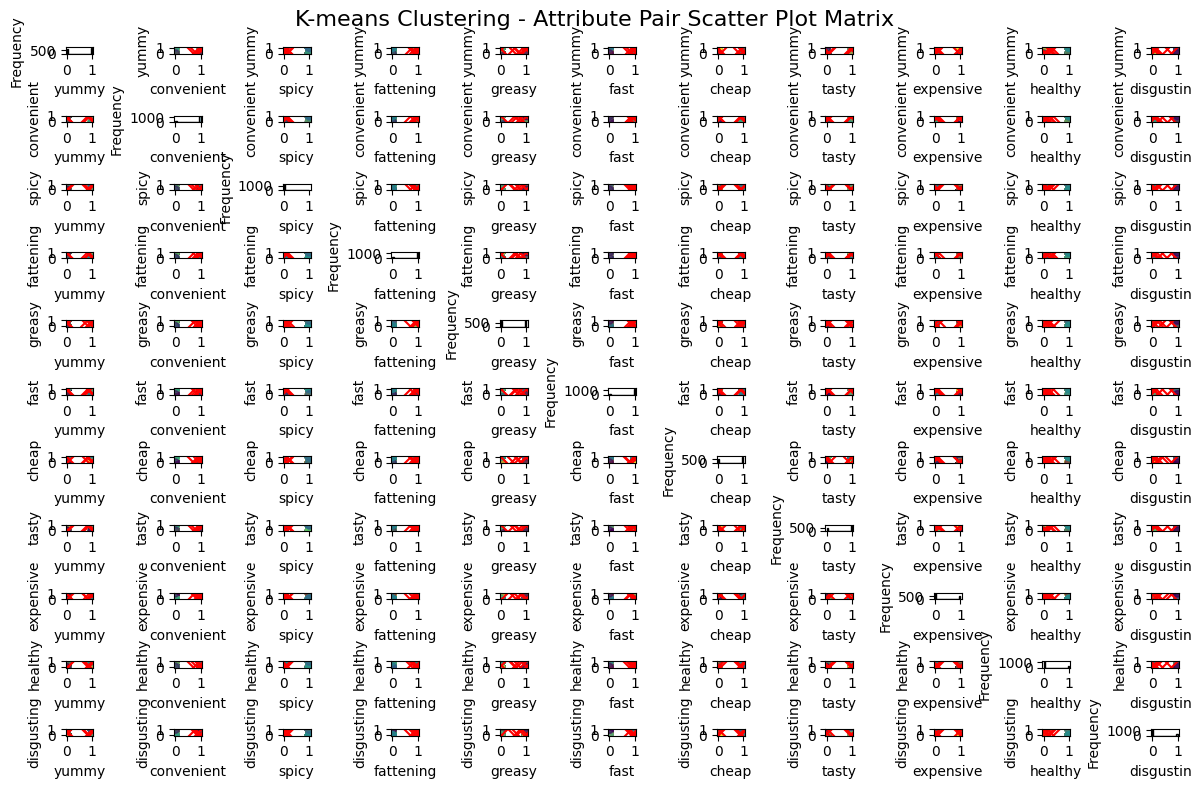

In [29]:
# Plotting the scatter plot matrix
plt.figure(figsize=(12, 8))
plt.suptitle('K-means Clustering - Attribute Pair Scatter Plot Matrix', fontsize=16)

for i in range(data.shape[1]):
    for j in range(data.shape[1]):
        plt.subplot(data.shape[1], data.shape[1], i * data.shape[1] + j + 1)
        if i == j:
            plt.hist(data.iloc[:, i], bins=20, color='lightblue', edgecolor='black')
            plt.xlabel(data.columns[i])
            plt.ylabel('Frequency')
        else:
            plt.scatter(data.iloc[:, j], data.iloc[:, i], c=labels, cmap='viridis', s=30, alpha=0.5)
            plt.scatter(centroids[:, j], centroids[:, i], marker='x', s=100, c='red')
            plt.xlabel(data.columns[j])
            plt.ylabel(data.columns[i])

plt.tight_layout()
plt.show()

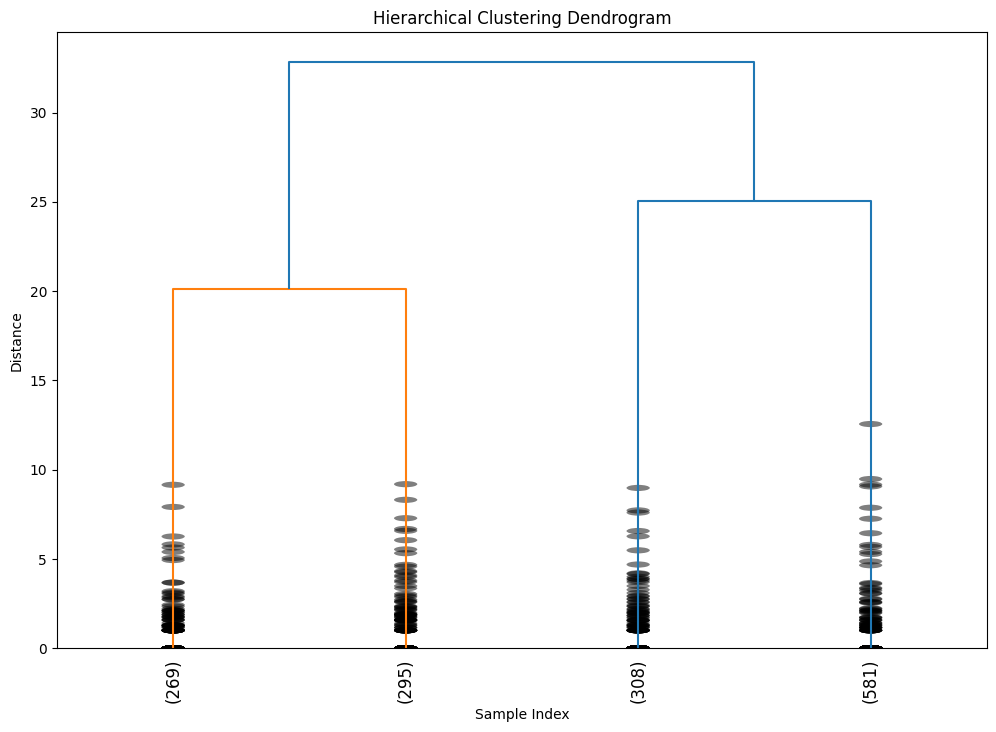

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming df is your DataFrame containing the data
# Ensure df is properly loaded before proceeding

# Extracting the relevant columns from the DataFrame
data = df[["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]]

# Perform hierarchical clustering
linked = linkage(data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(linked,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last 4 merged clusters
           show_contracted=True,  # show height of each cluster
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_leaf_counts=True)
plt.show()

C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\harsh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

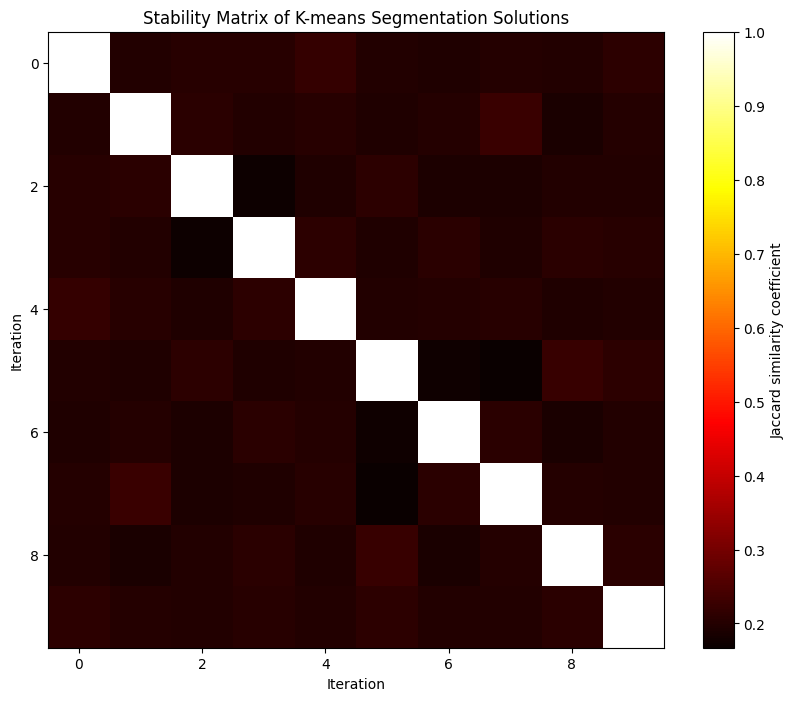

In [31]:
# Global stability of k-means segmentation solutions for the fast food data set
# Extracting the relevant columns from the DataFrame
data = df[["yummy", "convenient", "spicy", "fattening", "greasy", "fast", "cheap", "tasty", "expensive", "healthy", "disgusting"]]

# Define the number of bootstrap iterations
n_iterations = 10

# Define the number of clusters for K-means
n_clusters = 5

# Initialize a list to store cluster assignments for each iteration
cluster_assignments = []

# Perform bootstrap resampling
for i in range(n_iterations):
    # Generate a bootstrap sample (sampling with replacement)
    bootstrap_sample = data.sample(frac=1, replace=True, random_state=i)
    
    # Run K-means clustering on the bootstrap sample
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(bootstrap_sample)
    
    # Store the cluster assignments
    cluster_assignments.append(kmeans.labels_)

# Compute the stability matrix
stability_matrix = np.zeros((n_iterations, n_iterations))
for i in range(n_iterations):
    for j in range(n_iterations):
        # Compute the Jaccard similarity coefficient between cluster assignments
        stability_matrix[i, j] = np.mean(cluster_assignments[i] == cluster_assignments[j])

# Plot the stability matrix
plt.figure(figsize=(10, 8))
plt.imshow(stability_matrix, cmap='hot', interpolation='nearest')
plt.title('Stability Matrix of K-means Segmentation Solutions')
plt.xlabel('Iteration')
plt.ylabel('Iteration')
plt.colorbar(label='Jaccard similarity coefficient')
plt.show()


Stability matrix:
 [[0.         0.19683414 0.20509291 0.20578114 0.22161046 0.19889883
  0.19476944 0.20233999 0.19889883 0.20991053]
 [0.19683414 0.         0.20646937 0.1982106  0.20371645 0.19408121
  0.20233999 0.22780454 0.18788713 0.20233999]
 [0.20509291 0.20646937 0.         0.17343427 0.19408121 0.21197522
  0.19064006 0.19201652 0.19752237 0.19958706]
 [0.20578114 0.1982106  0.17343427 0.         0.21197522 0.19408121
  0.20784584 0.19545767 0.20646937 0.20440468]
 [0.22161046 0.20371645 0.19408121 0.21197522 0.         0.19752237
  0.20027529 0.20509291 0.19545767 0.1982106 ]
 [0.19889883 0.19408121 0.21197522 0.19408121 0.19752237 0.
  0.1761872  0.16724019 0.22298692 0.21266345]
 [0.19476944 0.20233999 0.19064006 0.20784584 0.20027529 0.1761872
  0.         0.2071576  0.18926359 0.19752237]
 [0.20233999 0.22780454 0.19201652 0.19545767 0.20509291 0.16724019
  0.2071576  0.         0.20233999 0.19889883]
 [0.19889883 0.18788713 0.19752237 0.20646937 0.19545767 0.22298692
  

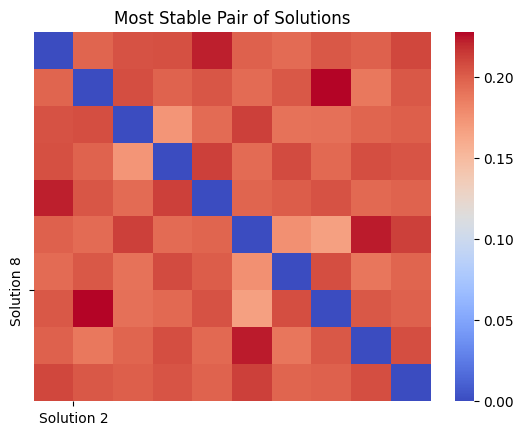

In [32]:
import seaborn as sns


# Analyze the stability matrix
np.fill_diagonal(stability_matrix, 0)
print("Stability matrix:\n", stability_matrix)
# Determine the most stable pair of solutions
most_stable_pair = np.unravel_index(np.argmax(stability_matrix), stability_matrix.shape)
print("\nThe most stable pair of solutions is solution {} and solution {}" \
      .format(*most_stable_pair))
# Visualize the most stable pair of solutions
sns.heatmap(stability_matrix, annot=False, cmap="coolwarm")
plt.title('Most Stable Pair of Solutions')
plt.xticks([most_stable_pair[0]], [f"Solution {most_stable_pair[0]+1}"])
plt.yticks([most_stable_pair[1]], [f"Solution {most_stable_pair[1]+1}"])
plt.show()